In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np
from shapely.geometry import Point

In [60]:
data = pd.read_csv('assests/weather.csv')

# Location of each city

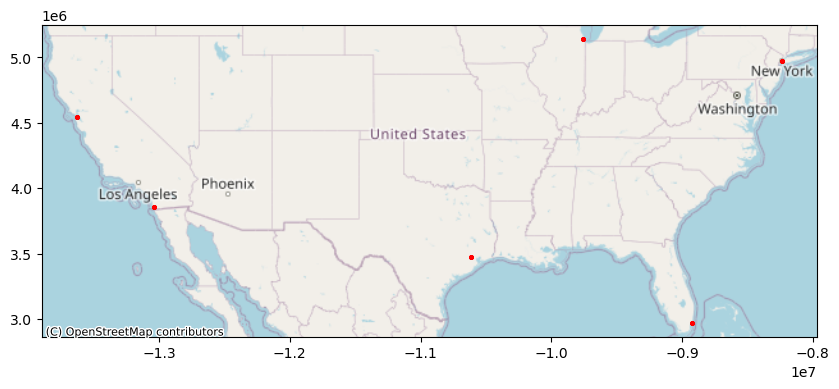

In [61]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_crs(epsg=3857, inplace=True)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=5)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

# Summary Statistics for sunhine for each city

<Figure size 1200x800 with 0 Axes>

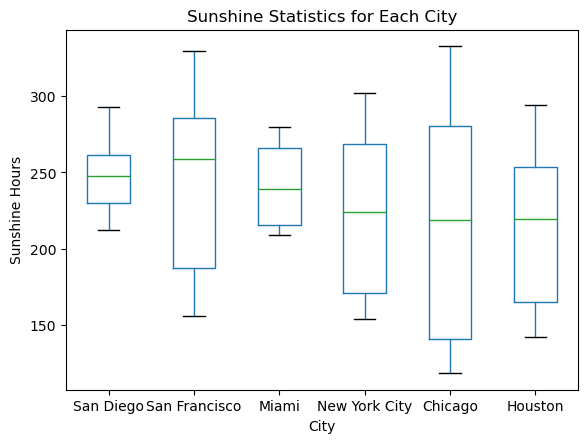

In [62]:
# Calculate the average sunshine for each city
avg_sunshine_order = data.groupby('city')['sunshine'].mean().sort_values(ascending=False).index

# Reorder the data based on the average sunshine
data['city'] = pd.Categorical(data['city'], categories=avg_sunshine_order, ordered=True)
data = data.sort_values('city')

# Create a box plot for sunshine statistics for each city
plt.figure(figsize=(12, 8))
data.boxplot(column='sunshine', by='city', grid=False)
plt.title('Sunshine Statistics for Each City')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('City')
plt.ylabel('Sunshine Hours')
plt.show()

# Summary Statistics for rainfall for each city

<Figure size 1200x800 with 0 Axes>

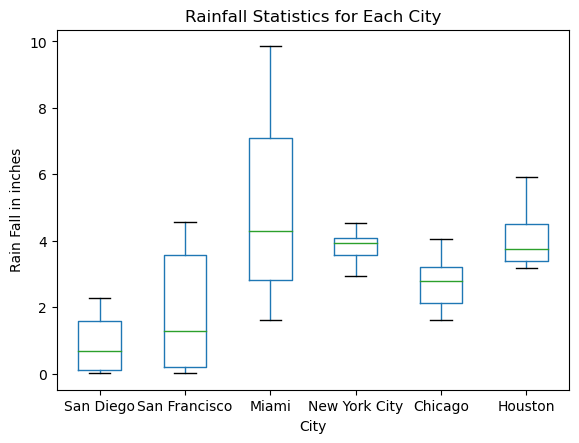

In [72]:
# Create a box plot for sunshine statistics for each city
plt.figure(figsize=(12, 8))
data.boxplot(column='rain', by='city', grid=False)
plt.title('Rainfall Statistics for Each City')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('City')
plt.ylabel('Rain Fall in inches')
plt.show()

# Summary Statistics for sunhine for each month

<Figure size 1200x800 with 0 Axes>

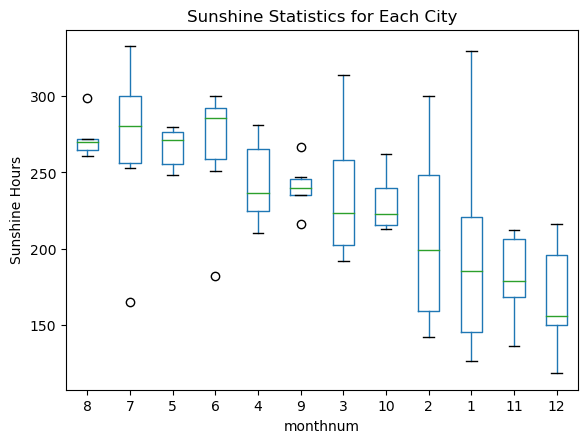

In [75]:
# Calculate the average sunshine for each month
avg_sunshine_order = data.groupby('monthnum')['sunshine'].mean().sort_values(ascending=False).index

# Reorder the data based on the average sunshine
data['monthnum'] = pd.Categorical(data['monthnum'], categories=avg_sunshine_order, ordered=True)
data = data.sort_values('monthnum')

# Create a box plot for sunshine statistics for each city
plt.figure(figsize=(12, 8))
data.boxplot(column='sunshine', by='monthnum', grid=False)
plt.title('Sunshine Statistics for Each City')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('monthnum')
plt.ylabel('Sunshine Hours')
plt.show()

<Figure size 1200x800 with 0 Axes>

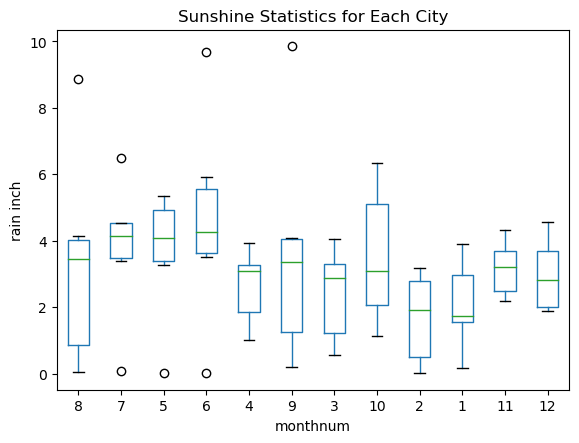

In [76]:
# Calculate the average sunshine for each month
avg_sunshine_order = data.groupby('monthnum')['rain'].mean().sort_values(ascending=False).index

# Reorder the data based on the average sunshine
data['monthnum'] = pd.Categorical(data['monthnum'], categories=avg_sunshine_order, ordered=True)
data = data.sort_values('monthnum')

# Create a box plot for sunshine statistics for each city
plt.figure(figsize=(12, 8))
data.boxplot(column='rain', by='monthnum', grid=False)
plt.title('Sunshine Statistics for Each City')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('monthnum')
plt.ylabel('rain inch')
plt.show()

# The correlation betwen rainfall and latitude and longtitude

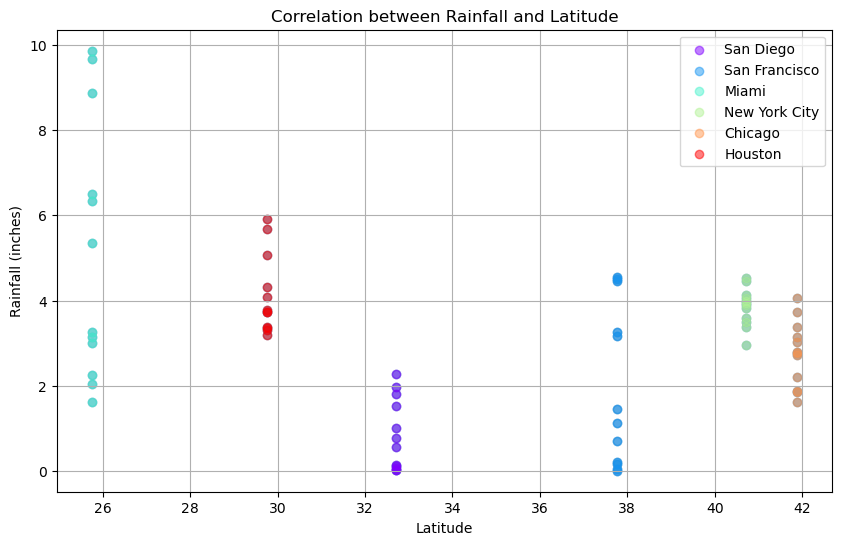

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lat'], data['rain'], alpha=0.5)
plt.title('Correlation between Rainfall and Latitude')
plt.xlabel('Latitude')
plt.ylabel('Rainfall (inches)')
plt.grid(True)
cities = data['city'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cities)))

for city, color in zip(cities, colors):
    city_data = data[data['city'] == city]
    plt.scatter(city_data['lat'], city_data['rain'], alpha=0.5, label=city, color=color)

plt.legend()
plt.show()

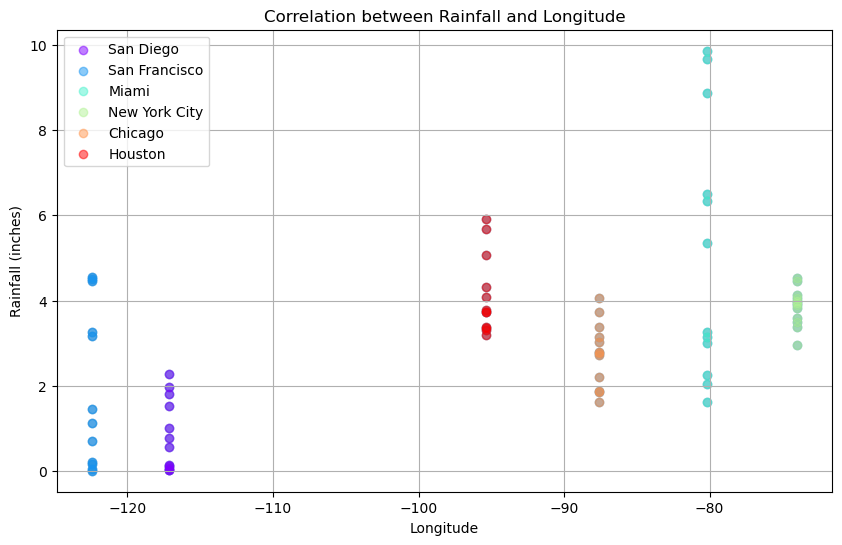

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lon'], data['rain'], alpha=0.5)
plt.title('Correlation between Rainfall and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Rainfall (inches)')
plt.grid(True)
cities = data['city'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cities)))

for city, color in zip(cities, colors):
    city_data = data[data['city'] == city]
    plt.scatter(city_data['lon'], city_data['rain'], alpha=0.5, label=city, color=color)

plt.legend()
plt.show()

# The correlation betwen sunshine and latitude and longtitude

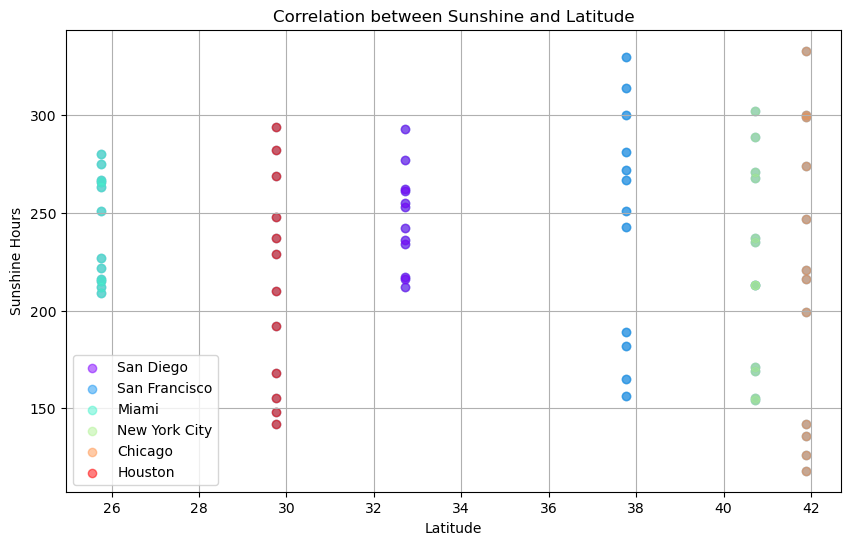

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lat'], data['sunshine'], alpha=0.5)
plt.title('Correlation between Sunshine and Latitude')
plt.xlabel('Latitude')
plt.ylabel('Sunshine Hours')
plt.grid(True)
cities = data['city'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cities)))

for city, color in zip(cities, colors):
    city_data = data[data['city'] == city]
    plt.scatter(city_data['lat'], city_data['sunshine'], alpha=0.5, label=city, color=color)

plt.legend()
plt.show()

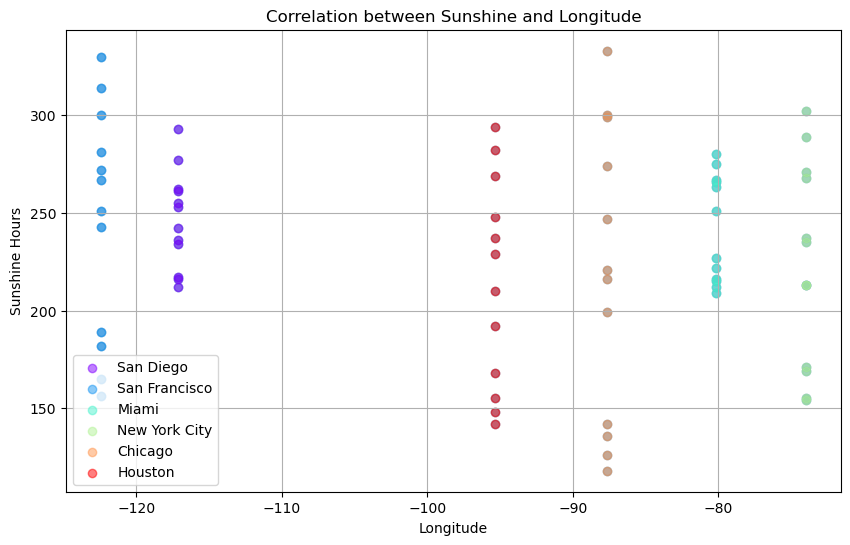

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lon'], data['sunshine'], alpha=0.5)
plt.title('Correlation between Sunshine and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Sunshine Hours')
plt.grid(True)
cities = data['city'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cities)))

for city, color in zip(cities, colors):
    city_data = data[data['city'] == city]
    plt.scatter(city_data['lon'], city_data['sunshine'], alpha=0.5, label=city, color=color)

plt.legend()
plt.show()

# The rainfall and sunshine distribution

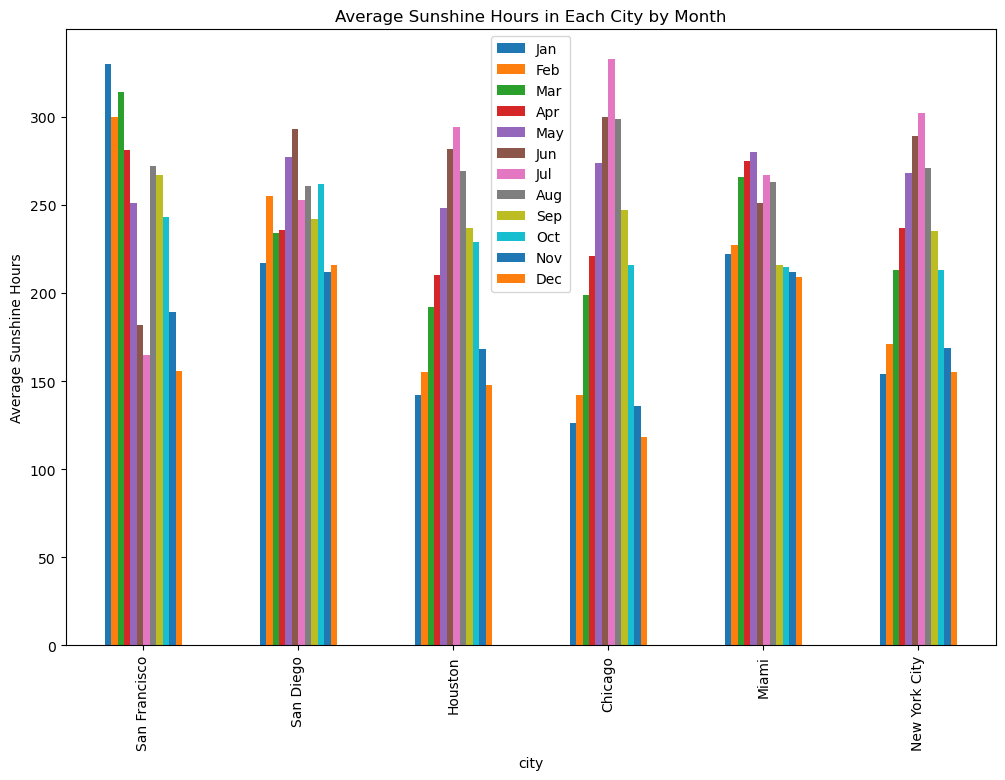

In [68]:
# What is the avg rainfall in each city in each month
avg_sunshine = data.groupby(['city', 'monthnum'])['sunshine'].mean().unstack()
avg_sunshine.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_sunshine = avg_sunshine[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
order = ['San Francisco', 'San Diego', 'Houston', 'Chicago', 'Miami', 'New York City']
avg_sunshine = avg_sunshine.reindex(order)

# avg_sunshine.index = ['San Francisco', 'San Diego', 'Houston', 'Chicago', 'Miami', 'New York City']
# avg_sunshine.index = ['Chicago', 'New York City', 'San Francisco', 'San Diego', 'Houston', 'Miami']

avg_sunshine.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Average Sunshine Hours')
plt.title('Average Sunshine Hours in Each City by Month')
plt.show()

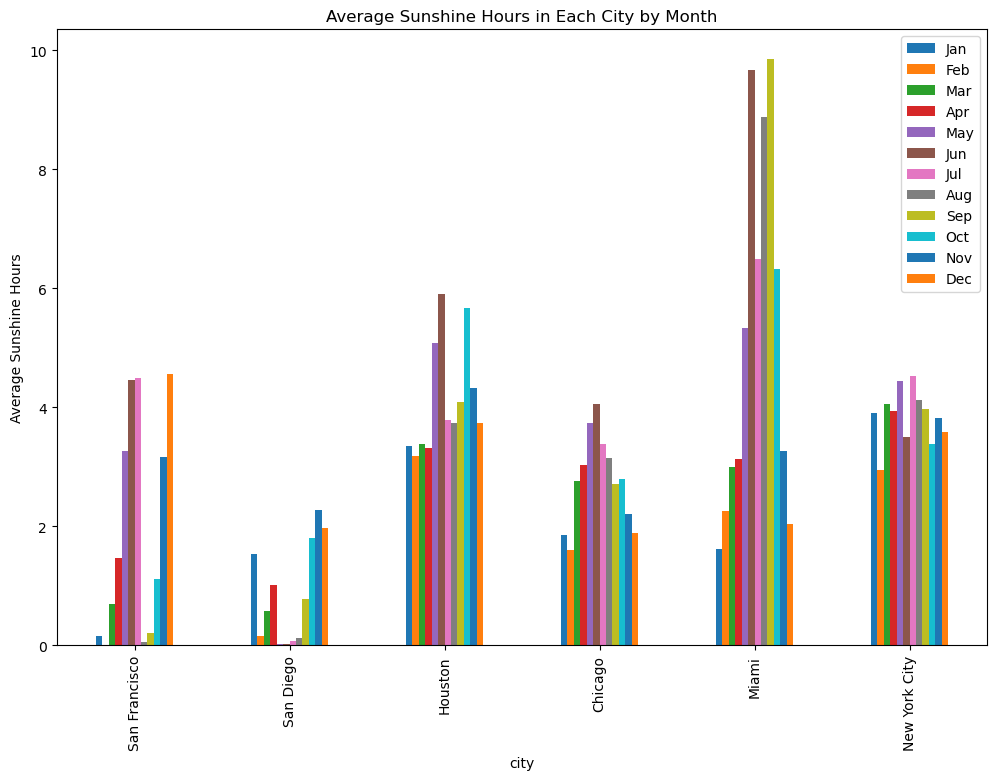

In [69]:
# What is the avg rainfall in each city in each month
avg_sunshine = data.groupby(['city', 'monthnum'])['rain'].mean().unstack()
avg_sunshine.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_sunshine = avg_sunshine[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
order = ['San Francisco', 'San Diego', 'Houston', 'Chicago', 'Miami', 'New York City']
avg_sunshine = avg_sunshine.reindex(order)
# avg_sunshine.index = ['Chicago', 'New York City', 'San Francisco', 'San Diego', 'Houston', 'Miami']

avg_sunshine.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Average Sunshine Hours')
plt.title('Average Sunshine Hours in Each City by Month')
plt.show()